## Exercise 1: Code Appendix

In [1]:
using LinearAlgebra, Plots

In [2]:
function make_FEM_A(x)
    M = length(x)
    
    offDiag = zeros(M-2)
    onDiag = zeros(M-2)
    
    # Loop over all grid points except boundary
    for i in 2:(M-1)
        offDiag[i-1] = -1/(x[i+1] - x[i])^2 * ( (x[i+1]^3 - x[i]^3)/3 + x[i+1] - x[i])
    end
    
    # Loop over all grid points except boundary
    for i in 2:(M-1)
       onDiag[i-1] = 1/(x[i+1] - x[i])^2 * ( (x[i+1]^3 - x[i]^3)/3 + x[i+1] - x[i]) + 1/(x[i] - x[i-1])^2 * ( (x[i]^3 - x[i-1]^3)/3 + x[i] - x[i-1])
    end
    
    A = Tridiagonal(offDiag[1:M-3], onDiag, offDiag[1:(M-3)])
    
    #return offDiag, onDiag
    return A
end

make_FEM_A (generic function with 1 method)

In [3]:
M = 30
h = 1/M

x = [i*h for i in 0:M]

31-element Array{Float64,1}:
 0.0
 0.03333333333333333
 0.06666666666666667
 0.1
 0.13333333333333333
 0.16666666666666666
 0.2
 0.23333333333333334
 0.26666666666666666
 0.3
 0.3333333333333333
 0.36666666666666664
 0.4
 ⋮
 0.6333333333333333
 0.6666666666666666
 0.7
 0.7333333333333333
 0.7666666666666666
 0.8
 0.8333333333333334
 0.8666666666666667
 0.9
 0.9333333333333333
 0.9666666666666667
 1.0

In [4]:
A = make_FEM_A(x)

29×29 Tridiagonal{Float64,Array{Float64,1}}:
  60.0889  -30.0778     ⋅         ⋅      …     ⋅         ⋅         ⋅ 
 -30.0778   60.2889  -30.2111     ⋅            ⋅         ⋅         ⋅ 
    ⋅      -30.2111   60.6222  -30.4111        ⋅         ⋅         ⋅ 
    ⋅         ⋅      -30.4111   61.0889        ⋅         ⋅         ⋅ 
    ⋅         ⋅         ⋅      -30.6778        ⋅         ⋅         ⋅ 
    ⋅         ⋅         ⋅         ⋅      …     ⋅         ⋅         ⋅ 
    ⋅         ⋅         ⋅         ⋅            ⋅         ⋅         ⋅ 
    ⋅         ⋅         ⋅         ⋅            ⋅         ⋅         ⋅ 
    ⋅         ⋅         ⋅         ⋅            ⋅         ⋅         ⋅ 
    ⋅         ⋅         ⋅         ⋅            ⋅         ⋅         ⋅ 
    ⋅         ⋅         ⋅         ⋅      …     ⋅         ⋅         ⋅ 
    ⋅         ⋅         ⋅         ⋅            ⋅         ⋅         ⋅ 
    ⋅         ⋅         ⋅         ⋅            ⋅         ⋅         ⋅ 
   ⋮                                     ⋱   

In [5]:
function make_F(f, x)
    M = length(x)
    F = zeros(M-2)
    
    for i in 2:(M-1)
        # Approximating integral with Trapezoid Rule
        F[i-1] = (f(x[i])*(x[i+1] - x[i]) + f(x[i])*(x[i] - x[i-1]))/2
    end
    return F
end

make_F (generic function with 1 method)

In [6]:
true_f(x) = 2*(3*x^2 - x + 1)
true_u(x) = x*(1 - x)

true_u (generic function with 1 method)

In [7]:
F = make_F(true_f, x)
C = A \ F

29-element Array{Float64,1}:
 0.032211740809253056
 0.06220210354504637
 0.08997110388553643
 0.11551875164797433
 0.13884505078806578
 0.15994999952536154
 0.17883359058506879
 0.19549581154212434
 0.20993664524997221
 0.2221560703343856
 0.23215406173187558
 0.23993059125263508
 0.2454856281493823
 ⋮
 0.23993723603165953
 0.2321625947453146
 0.22216621669943917
 0.2099480677284199
 0.19550811468848658
 0.17884632562136
 0.15996266987791094
 0.13885711820623636
 0.11552964280864293
 0.08998021737194493
 0.06220881707526405
 0.03221541857921432

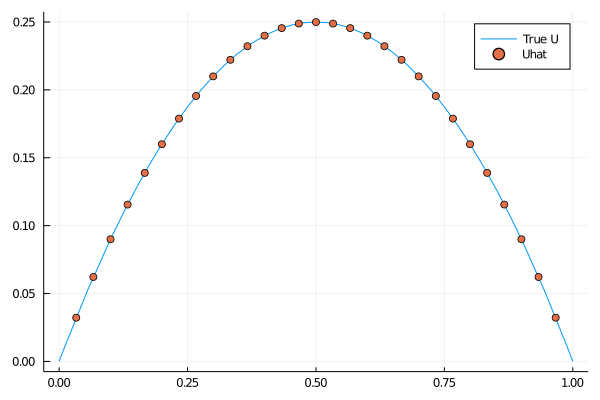

In [8]:
plot(x -> true_u(x), 0, 1, 
    label = "True U")
scatter!(x[2:(length(x) - 1)], C,
    label = "Uhat")

## Part (c) Test Accuracy as function of $h$

In [10]:
function get_inf_accuracy(true_u, u_hat, x)
    discret_u = [true_u(xi) for xi in x[2:(length(x)-1)]]
    
    return maximum(abs.(discret_u .- u_hat))
end

get_inf_accuracy (generic function with 1 method)

In [11]:
M = 200
x = [i / M for i in 0:M]

A = make_FEM_A(x)
F = make_F(true_f, x)
C = A \ F

get_inf_accuracy(true_u, C, x)

1.5737179526187361e-6

In [12]:
### For various M, generate error
M_values = [5, 10, 20, 40, 80, 160, 320]

uniform_accuracy = []
for M_size in M_values
    x = [i / M_size for i in 0:M_size]

    A = make_FEM_A(x)
    F = make_F(true_f, x)
    C = A \ F

    push!(uniform_accuracy, get_inf_accuracy(true_u, C, x))
end

uniform_accuracy

7-element Array{Any,1}:
 0.002503650522406753
 0.0006249615050749058
 0.00015733694607772408
 3.933102762151974e-5
 9.835245210587651e-6
 2.4588865398522675e-6
 6.147364057795812e-7

Accuracy appears to become 1/4th as h halves. Order is $O(h^2)$.

## Part (d). Non-uniform grid

In [13]:
M = 25
x_nonunif = [(i/(M+1))^2 for i in 0:M+1]

A = make_FEM_A(x_nonunif)
F = make_F(true_f, x_nonunif)
C = A \ F;

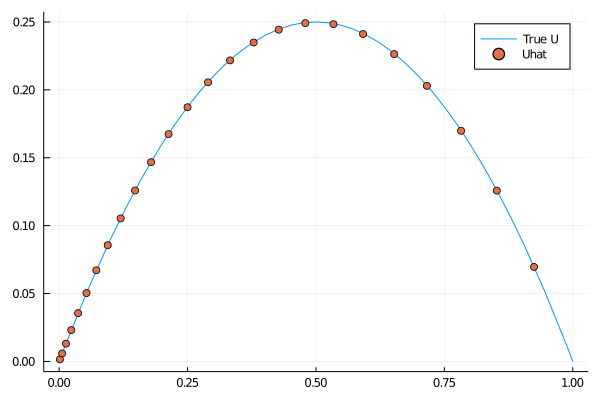

In [14]:
plot(x -> true_u(x), 0, 1, 
    label = "True U")
scatter!(x_nonunif[2:(length(x_nonunif) - 1)], C,
    label = "Uhat")

In [15]:
### For various M, generate error
M = [5, 7, 10, 14, 20, 28, 40, 56]

non_uniform_accuracy = []
non_uniform_h = []

for M in M_values
    x = [(i/(M+1))^2 for i in 0:M+1]

    A = make_FEM_A(x)
    F = make_F(true_f, x)
    C = A \ F
    
    push!(non_uniform_h, maximum(diff(x)))
    push!(non_uniform_accuracy, get_inf_accuracy(true_u, C, x))
end

In [16]:
non_uniform_h

7-element Array{Any,1}:
 0.30555555555555547
 0.17355371900826455
 0.09297052154195018
 0.04818560380725767
 0.02453894223441555
 0.012383781489911705
 0.006220824720256979

In [17]:
non_uniform_accuracy

7-element Array{Any,1}:
 0.007747431796788495
 0.002471203614839018
 0.0006799635712734509
 0.00017902020615093162
 4.594047342171281e-5
 1.1629164467424902e-5
 2.9255791754445593e-6

As $h = \max_i x_{i+1} - x_{i}$ halves, accuracy (according to infinity norm) shrinks by 1/4. Order is once again $O(h^2)$. 